# Grafy a vizualizace

Vhodná vizualizace dat je klíčem k jejich pochopení. V Pythonu existuje velké množství knihoven
pro tvorbu 2D a 3D grafů. Představíme si porovnání knihoven Matplotlib a Plotly a podrobněji se seznámíme s možnostmi knihovny Matplotlib, která je defacto standardem.

[Python graph galery](https://python-graph-gallery.com/)
- Pro inspiraci, nebo pokud máte vizuální představu o grafu a chcete najít příslušný kód.


[Cheetsheet](https://python-graph-gallery.com/wp-content/uploads/Matplotlib_cheatsheet_datacamp.png), spíše přehled základů.







## Porovnání dvou knihoven

### Matplotlib
Standardní knihovna pro tvorbu grafů je [matplotlib](https://matplotlib.org/).

**Výhody**:
- vysoká kvalita grafů, tisková kvalita
- částečná interaktivita grafů (s problémy)
- velké množství příkladů
- free software

**Nevýhody**:
- roztříštěné rozhraní
- pouze 2d, 3d grafy jen v omezané podobě


### Plotly
V mnoha ohledech lepší, ale částečně placená knihovna [Plotly](https://plot.ly/python/line-and-scatter/).

**Výhody**:
- vysoká kvalita grafů, ale spíše pro online publikaci
- lepší interaktivita grafů
- objektový přístup, přehledný návrh
- možnost provázání s cloudovou službou 
- skutečné 3d grafy

**Nevýhody**:
- menší rozšíření, méně příkladů
- nutnost prohlížeče pro vizualizaci, omezené možnosti offline zpracování
- cena (pro některá použití)
- ukládání do vektorových formátů (PDF, SVG, EPS) pouze v placené verzi



# Matplotlib
Zdroje:

- [Anatomy of Matplotlib](http://nbviewer.jupyter.org/github/WeatherGod/AnatomyOfMatplotlib/tree/master/) ... výborný tutoriál a přehled nejpoužívanějších funkce
- [Oficiální tutoriály](https://matplotlib.org/tutorials/index.html) pro různé typy grafů na stránkách Matplotlib.

### Graf funkce
Modul 'matplotlib.pyplot' lze použít k tvorbě grafů přímo což je velmi podobné Matlabu.
Pokud chceme s vytvořnými grafy dále pracovat, nějak je kombinovat a podobně je třeba použít objektový přístup, 
viz. dále.

In [1]:
# Simple plot
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.0, 4*np.pi, 60)
y = np.sin(x)
plt.plot(x, y)
plt.show()


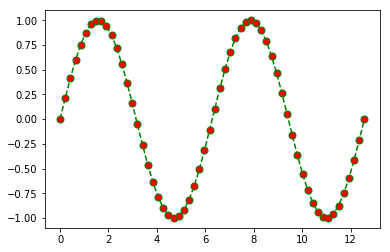

In [2]:
# Styl: barav, typ čáry, body, typ bodu, ...
plt.plot(x, y, color='green', linestyle='dashed', marker='o',
     markerfacecolor='red', markersize=7)
plt.show()

[Nastavení stylů čar a bodů](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)... platí pro příkaz `plot` a další podobné příkazy.


Zkratky typů bodů:

    all_poss=['.','o','v','^','>','<','s','p','*','h','H','D','d','1','','']

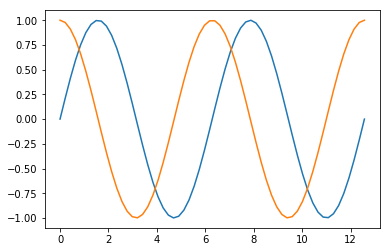

In [3]:
# More graphs in single plot

y1 = np.sin(x)
y2 = np.sin(x + np.pi/2)
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

## Figure, Axes, Subplots ...

Výstup z matplotlib je 'obrázek' (`Figure`), obrázek se skládá z 'os' (`Axes`) což jsou vlastně jednotlivá okénka grafů, která je možno skládat vedle sebe (nebo i přes sebe). Dosavadní příklady používaly implicitní Figure a implicitní Axes modulu `pyplot`. To je výhodné pro jednoduché grafy, ale nevhodné pro cokoliv složitějšího. Velmi pěkně je to vysvětleno
v [Anatomy of Matplotlib - Figures ...](http://nbviewer.jupyter.org/github/WeatherGod/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part1-Figures_Subplots_and_layouts.ipynb)

Předchozí příklad doplněný o popisky a další prvky lze provést také takto:


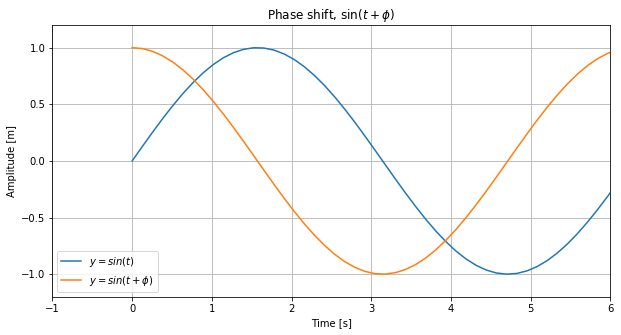

In [4]:
# Titles, legend, ...

# Figure size (must be set before plotting)
fig = plt.figure(figsize=(10,5))
# Axis = podgraf, zde jen jeden.
ax = fig.add_subplot(111)

x = np.linspace(0.0, 4*np.pi, 100)
y1 = np.sin(x)
y2 = np.sin(x + np.pi/2)

# Legend labels, using TeX
ax.plot(x,y1, label='$y = sin( t )$')
ax.plot(x,y2, label='$y = sin( t + \phi)$')

# Limits for X and Y axis.
ax.set_xlim([-1, 6])
ax.set_ylim([-1.2, 1.2])
# Or plt.axis([-1, 6, -1.2, 1.2])

# axis labels, title
ax.set_ylabel('Amplitude [m]')
ax.set_xlabel('Time [s]')
# Using TeX in titles
ax.set_title('Phase shift, $\sin(t + \phi)$')

# Legend
ax.legend()

# Grid on
ax.grid()


plt.show()


## Další užitečné druhy grafů

### Krabicové grafy, zobrazení statistických dat
Box plot - [dokumentace](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html)

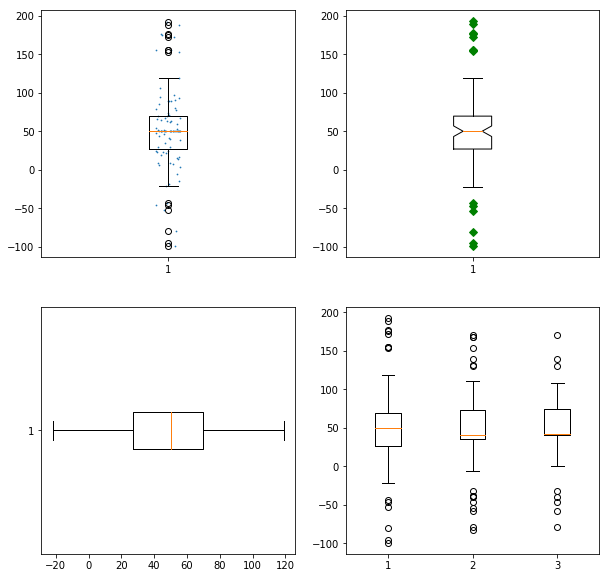

In [7]:

def make_data(mean):
    """
    Return nontrivial random dataset vector.
    """
    spread = np.random.rand(50) * 100
    center = np.ones(25) * mean
    flier_high = np.random.rand(10) * 100 + 100
    flier_low = np.random.rand(10) * -100
    return np.concatenate((spread, center, flier_high, flier_low), 0)


data = make_data(50)
fig = plt.figure(figsize=(10,10))

# Box plot with outlayers.
ax1 = fig.add_subplot(221)
ax1.boxplot(data)

# show jittered data
ax1.scatter(np.random.rand(len(data))*0.1 + 1 - 0.05, data, s=0.5)

# Box plot variant (notched plot), outlayer color and symbols, lot of other options...
ax2 = fig.add_subplot(222)
ax2.boxplot(data, notch=True, sym='gD')

# Horizontal box, no outlayers
ax3 = fig.add_subplot(223)
ax3.boxplot(data, vert=False, sym='')


# fake up some more data
d2 = make_data(40)

data.shape = (-1, 1)
d2.shape = (-1, 1)
# data = concatenate( (data, d2), 1 )
# Making a 2-D array only works if all the columns are the
# same length.  If they are not, then use a list instead.
# This is actually more efficient because boxplot converts
# a 2-D array into a list of vectors internally anyway.
data = [data, d2, d2[::2, 0]]

# multiple box plots on one figure
ax2 = fig.add_subplot(224)
plt.boxplot(data)

plt.show()



- [scatter plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)
- [scatter plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)

## Grafy v tiskové kvalitě
Pro přípravu grafů do článů a podobně jsou nutné další vlastnosti:


- Možnost jemného nastavení detailů: tloušťky čar, dělení os, legenda, polohy a mezery.
  Něco již bylo ukázáno, vše je možné a lze najít příklady.


- Použití vzorců v grafu je často nutností. Matplotlib standardně umožňuje použít TeX notaci, ale provádí vlastní formátování, viz. dokumentace k [mathtext](https://matplotlib.org/users/mathtext.html#mathtext-tutorial). Pro tisk je vhodné dosáhnout plné kompatibility s okolním textem (včetně použitého fontu). Matplotlib umožňuje renderování vzorců přímo LaTeXem [zde](https://matplotlib.org/users/usetex.html#usetex-tutorial).

- Uložení grafu ve vektorovém formátu: PDF, EPS, SVG. Poslední formát je snadno možné dále editovat např. pomocí programu Inkscape.





In [8]:
# saving to file

from matplotlib.backends.backend_pdf import PdfPages


# save into PDF
# Using `with` force closing the output file.
with PdfPages('foo.pdf') as pp:
    pp.savefig(fig)
    
# save as PNG goes other way
fig.savefig('foo.png')
    


## Animation with Matplotlib

Modul `matplotlib.animation` umožňuje tvorbu jednoduchých animovaných grafů. Pro zobrazení v Jupiter notebooku je třeba import `HTML` a zobrazení pomocí html5.

** Možné problémy **
Chybějící knihovna 'ffmpeg'. Řešení:

Anaconda: `conda install -c menpo ffmpeg`
Debian, Ubuntu: `sudo apt install ffmpeg` 

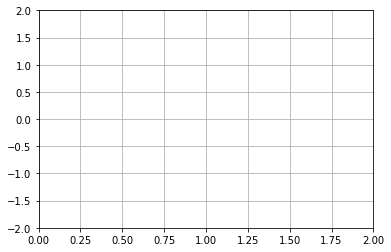

In [10]:
import matplotlib.animation as animation
from IPython.display import HTML


# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))
ax.grid()

# Plot object that we want to animate
line, = ax.plot([], [], lw=2)



# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)



# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)


anim = animation.FuncAnimation(fig, animate, blit=False, interval=10,
                               init_func=init)

# For embedding into Jupiter notebook.
HTML(anim.to_html5_video())

# In a python script use:
# plt.show()



## Cvičení
1. Udělejte graf obsahující 5 sinusovek sin(x + h), h=np.arange(0, 0.5, 0.1). 
2. Sinusovkam přiřaďte zelenou barvu a s rostoucím 'h' měňte s použitím colormap, viz. [příklad](https://stackoverflow.com/questions/8931268/using-colormaps-to-set-color-of-line-in-matplotlib)
3. Přidejte legendu s hodnotami 'h' a popisek na vertikální osu se vzorečkem $y = sin(x + h)$. 
4. Pro horizontální osu použijte logaritmickou stupnici (zkuste dohledat).
3. Pro náhodná data:

        xyz = np.rand((1000, 3))
        xyz[:,2] = sin(2*np.pi*xyz[:,0])*cos(2*np.pi*xyz[:,1]) +xyz[:, 2]
    
   vytvořte scatter plot s velikostí kruhových bodů danou složkou Z.
6. Vytvořte animaci skákajícího míčku s vektorem rychlosti zobrazeným pomocí šipky.
